### Added import for filling images list

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {return false;}

<IPython.core.display.Javascript object>

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
import glob

### Auxiliary Functions for retrieving image paths, reading, and displaying images

In [3]:
def set_of_images_location(path):

    directory= os.listdir(path)

    p = []
    for d in directory:
        source_path  = os.path.join(path, d)
        FN = glob.glob(os.path.join(source_path,'*.jpg'))
        p.append(FN)

    return p

In [4]:
def image_read(image_location):
    M = cv.imread(image_location)
    if M is None:
        raise IOError('cannot find immage %s' % image_location)

    return M

In [5]:
def image_show(M,figsize=(8, 8), gray_image=False):
    """
    show image using a gray scale

    image_show(M)

    Parameters
    ----------

    M numpy matrix of the image
    """
    fig = plt.figure(figsize=figsize)
    ax = fig.subplots()
    if gray_image:
      ax.imshow(M,'gray')
    else:
      ax.imshow(M)

    ax.grid(False)

### Defined names for the image paths inluding the testing and training set for the CNN model and the predictions set for use after the model has been trained

In [6]:
base_folder = os.path.join(os.getcwd(),'FiberglassPictures/')

print ("current working folder:", base_folder)

test_images_location    = set_of_images_location(os.path.join(base_folder ,'testing'))
train_images_location   = set_of_images_location(base_folder+'training/')
predict_images_location = set_of_images_location(base_folder+'predictions/')

anoumalous_images_path  = test_images_location[1]+train_images_location[1]+predict_images_location[1]
pristine_images_path    = test_images_location[0]+train_images_location[0]+predict_images_location[0]


current working folder: /home/alexandre/Documents/FiberglassDefectSpotter/FiberglassPictures/


### M: reads images location
### M1: converts to gray image
### M2: set pixels to 0 or 255 considering the values around the pixel not the whole image
### M3: blurrs the image by "smuging' the values around each individual pixal making them similar ro each other in value
### M4: binary treshhold turning each pixel's value to 0 or 255
### M5: find the contours of the spots, draws contour line with tickness 30 around the contours found, and fills contours
### M6: make smaller pictures
### M7: reapply binary threshold to ensure the resizing effect did not effect the pixel values

<IPython.core.display.Javascript object>


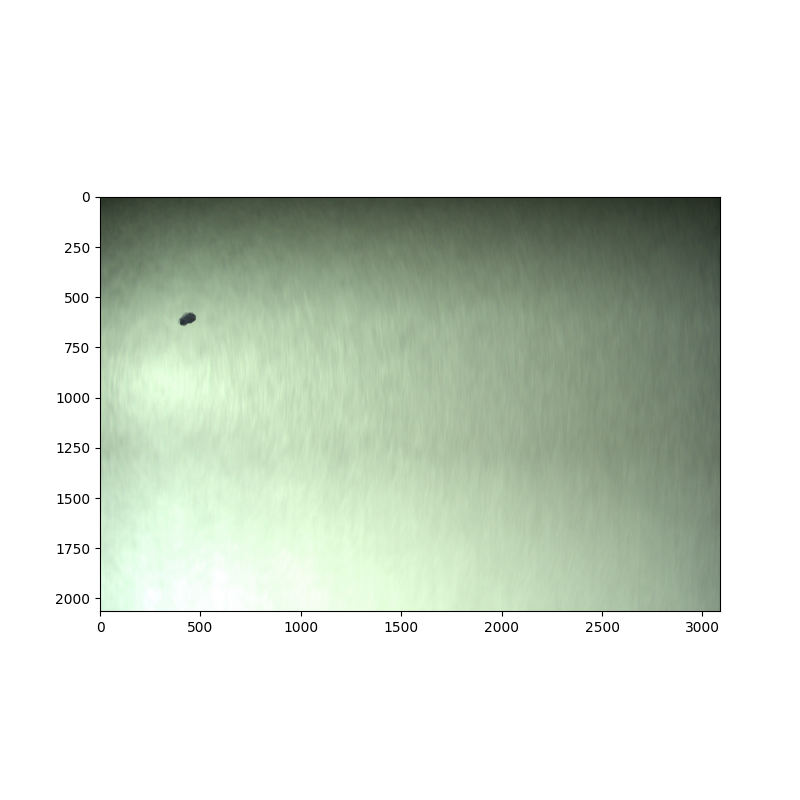

<IPython.core.display.Javascript object>


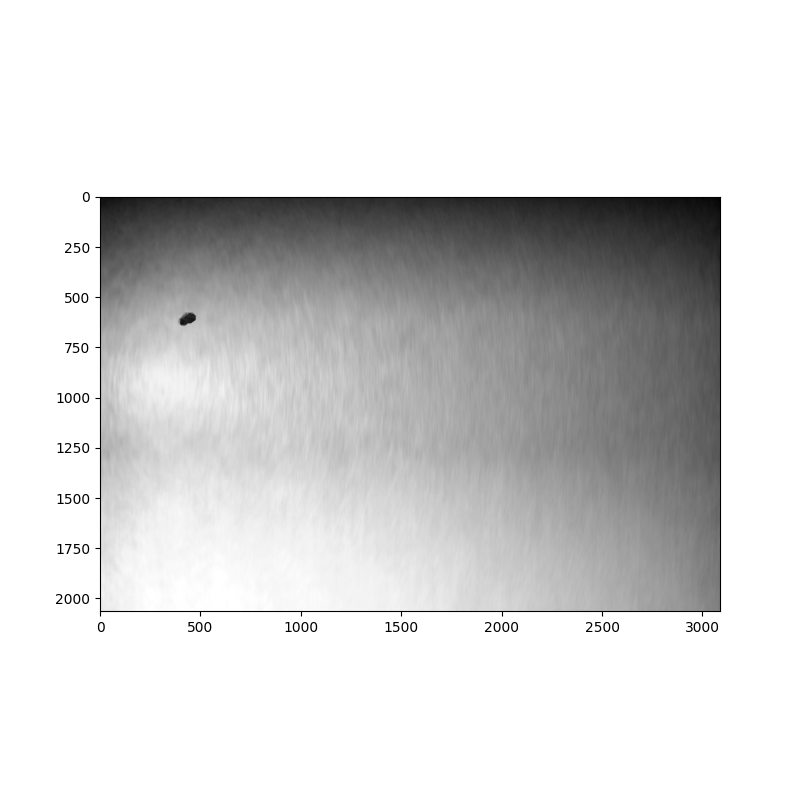

<IPython.core.display.Javascript object>


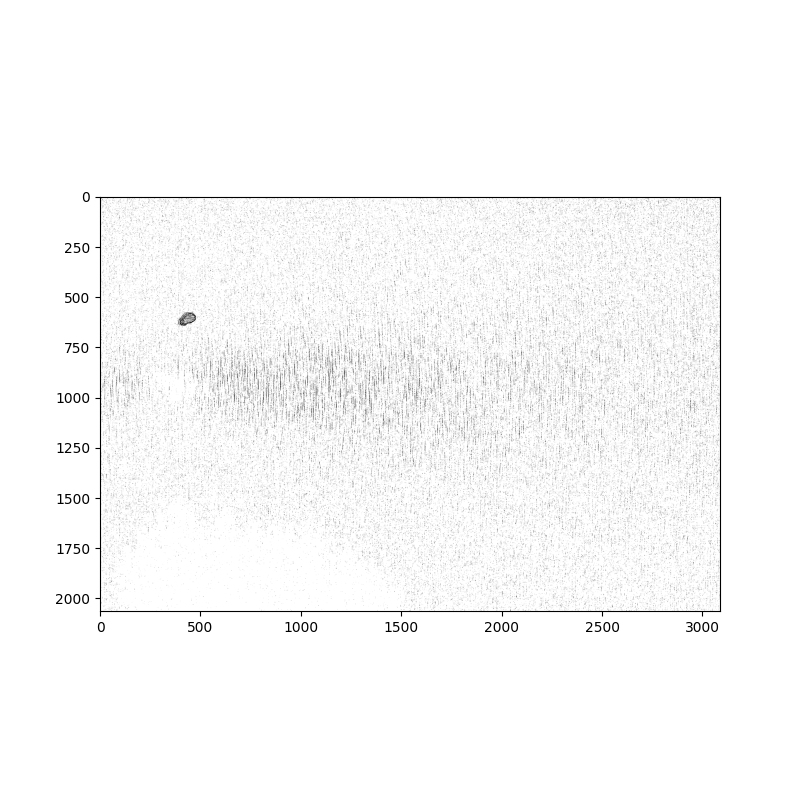

<IPython.core.display.Javascript object>


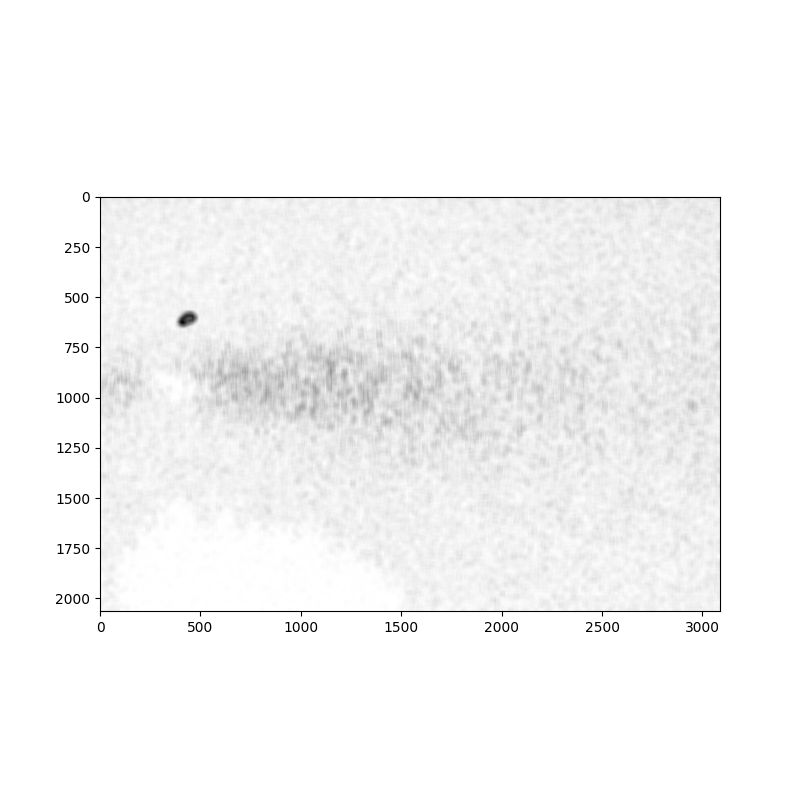

<IPython.core.display.Javascript object>


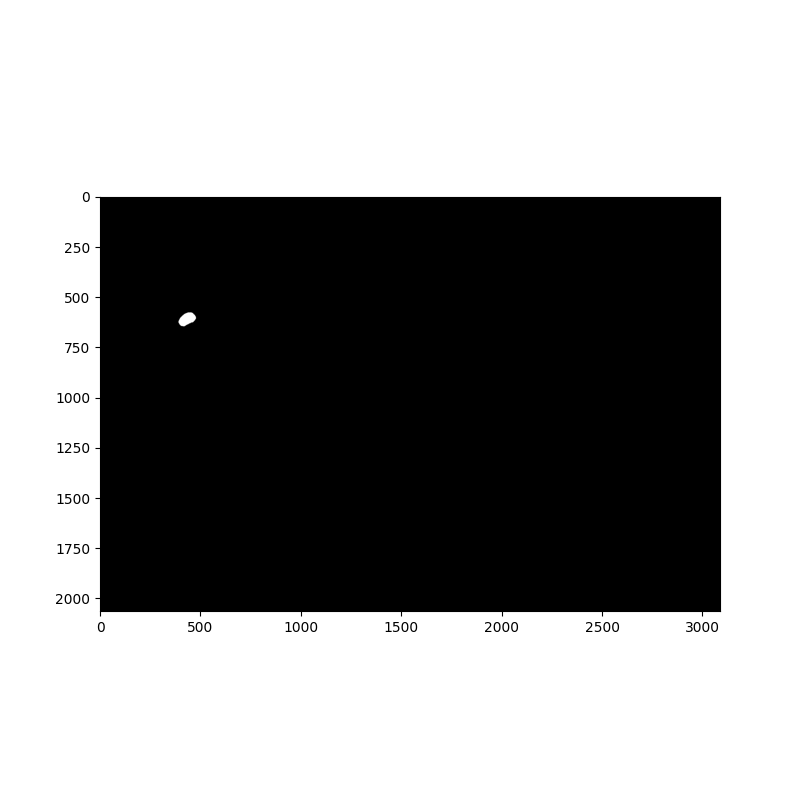

<IPython.core.display.Javascript object>


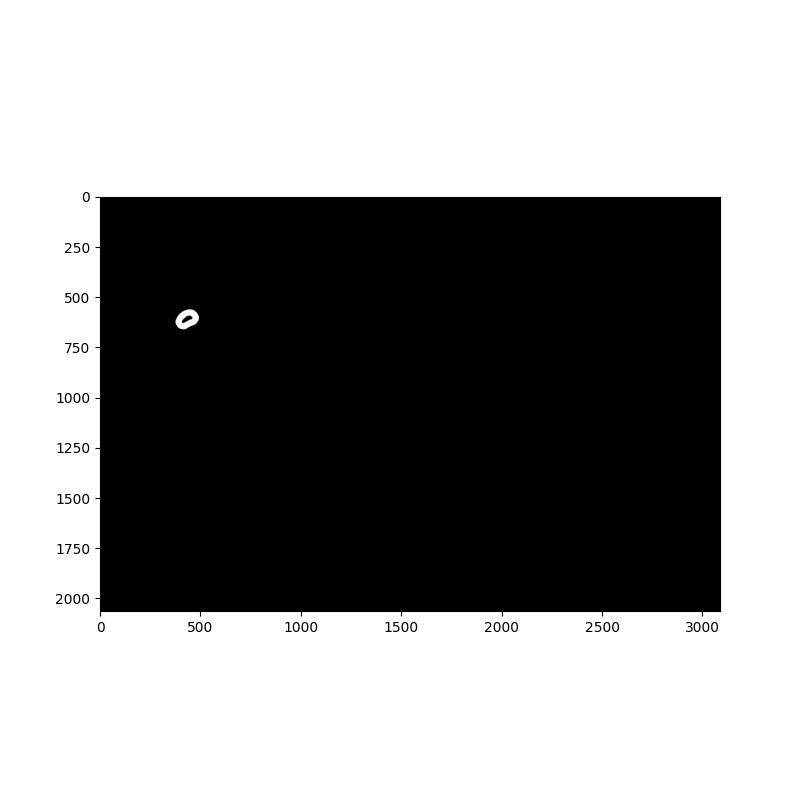

<IPython.core.display.Javascript object>


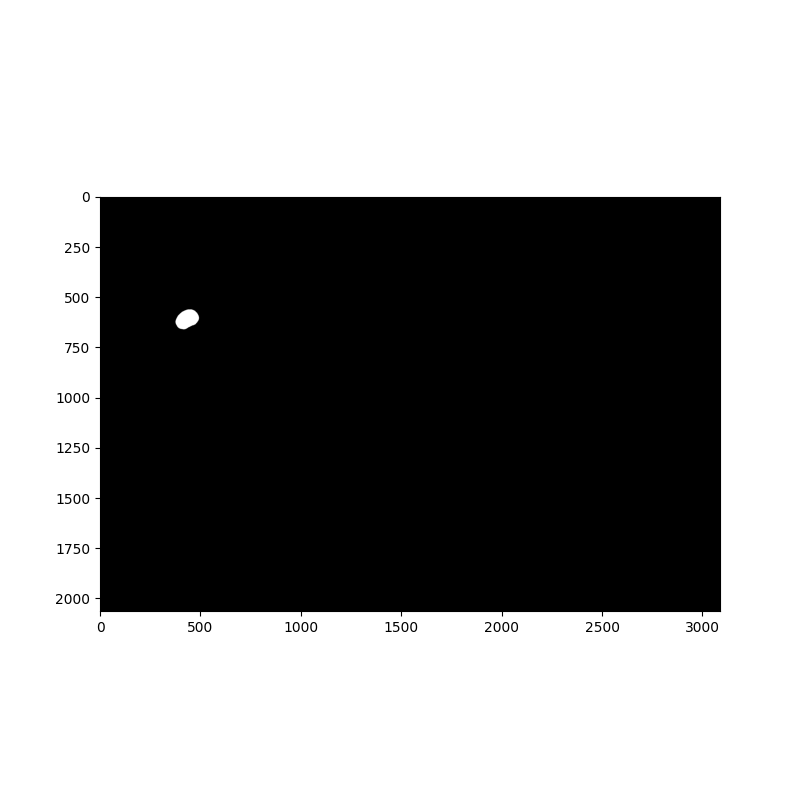

<IPython.core.display.Javascript object>


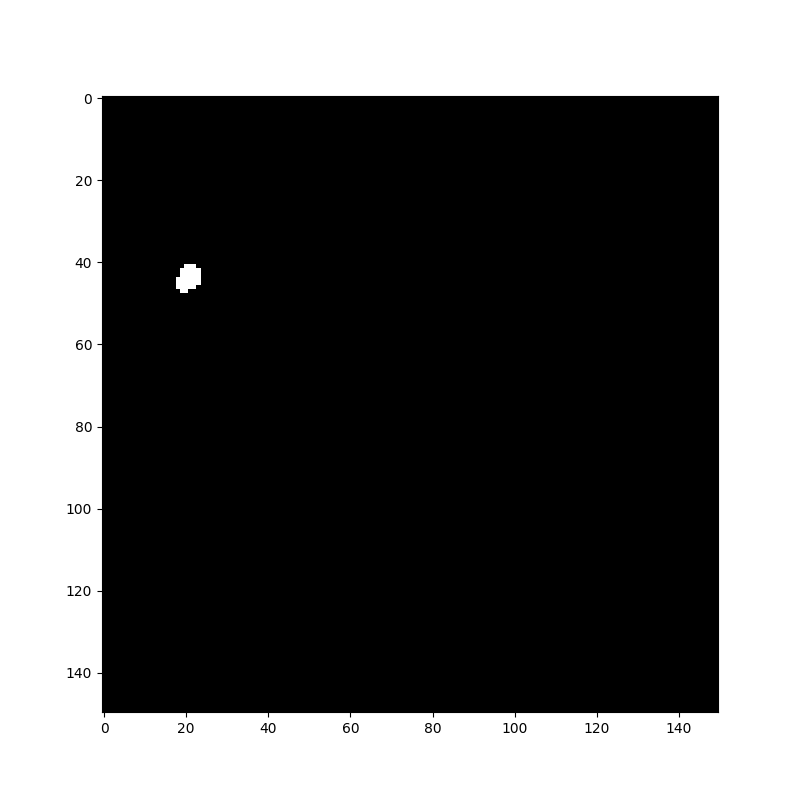

<IPython.core.display.Javascript object>


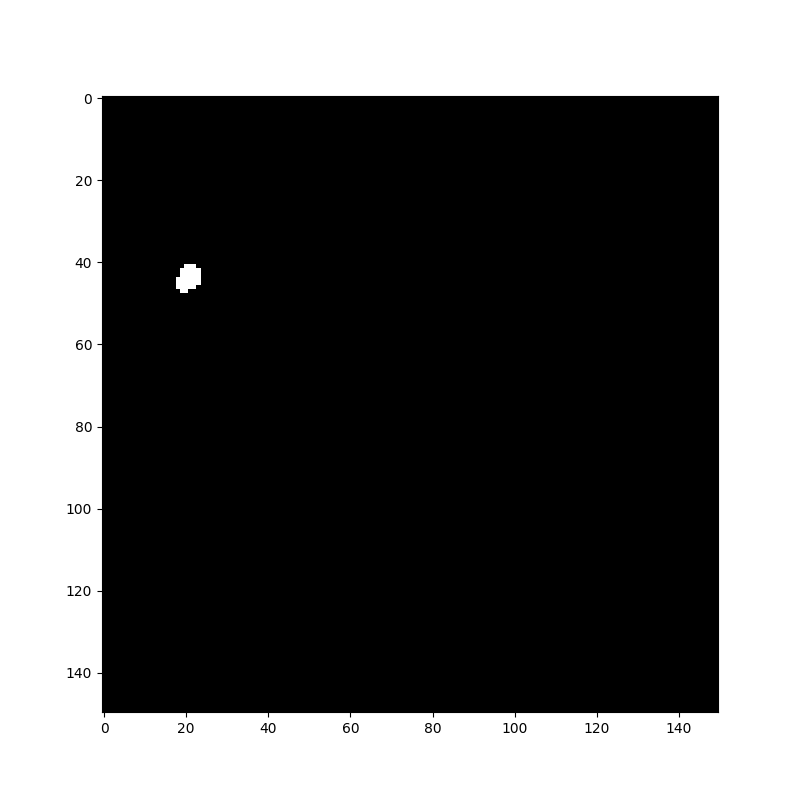

In [7]:
plt.close("all")

M  = image_read (test_images_location[0][0]);                                               image_show(M)

M1 = cv.cvtColor         (M, cv.COLOR_BGR2GRAY);                                            image_show(M1, gray_image=True)
M2 = cv.adaptiveThreshold(M1, 255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2);    image_show(M2, gray_image=True)
M3 = cv.blur             (M2, (30,30));                                                     image_show(M3, gray_image=True)
M4 = cv.threshold        (M3, 180,255,cv.THRESH_BINARY_INV)[-1];                            image_show(M4, gray_image=True)
contours, hierarchy = cv.findContours(M4, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
M5 = np.zeros_like(M4)
cv.drawContours(M5, contours, -1, (255,0,0),  30);                                          image_show(M5, gray_image=True)
cv.drawContours(M5, contours, -1, (255,0,0), -1);                                           image_show(M5, gray_image=True)
M6 = cv.resize(M5,(150,150));                                                               image_show(M6, gray_image=True)
M7 = cv.threshold (M6, 1,255,cv.THRESH_BINARY)[-1];                                         image_show(M7, gray_image=True)


### Shows original image with the defect being highlighted by the drawContours

<IPython.core.display.Javascript object>


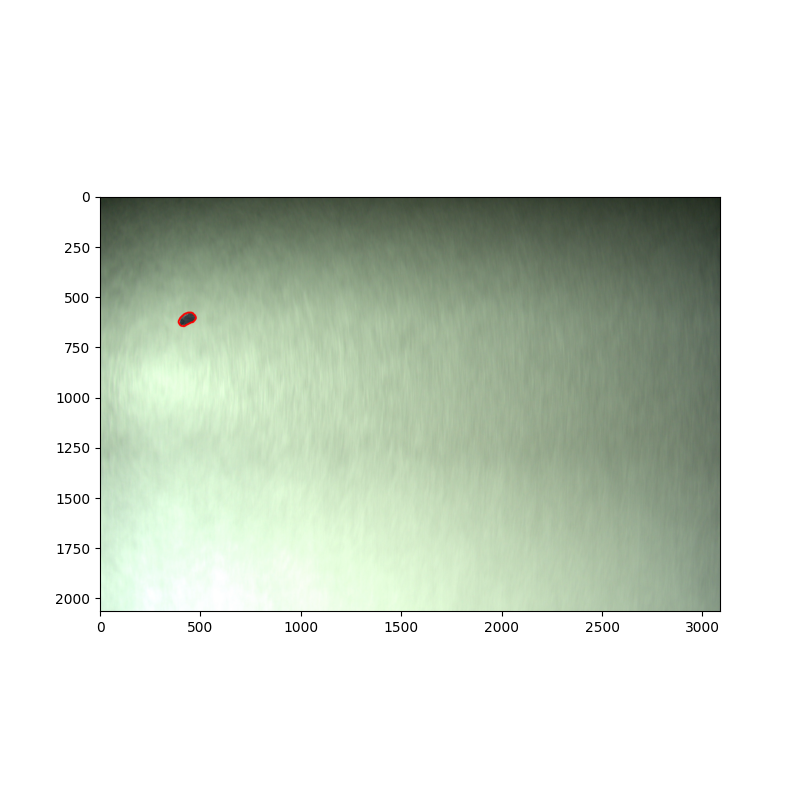

spots found: 1


In [8]:
cv.drawContours(M, contours, -1, (255,0,0), 8)
image_show(M, gray_image=True)

print("spots found:" , len(contours))


In [9]:
os.sys.path

['/home/alexandre/Documents/FiberglassDefectSpotter',
 '/usr/lib/python39.zip',
 '/usr/lib/python3.9',
 '/usr/lib/python3.9/lib-dynload',
 '',
 '/usr/local/lib/python3.9/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.9/dist-packages',
 '/usr/local/lib/python3.9/dist-packages/IPython/extensions',
 '/home/alexandre/.ipython']